# ***Intro to ML1***



## ***Wprowadzenie***

W tym notatniku przedstawię przykładową implementację metod opisanych podczas wykładu przy użyciu zaprojektowanych w tym celu popularnych bibliotek języka Python.

Omówiona zostanie regresja i klasyfikacja, a także zaimplementowane i dostępne w gotowych bibliotekach metody przeznaczone do tworzenia i treningu modeli uczenia maszynowego. 

## ***Wykorzystywane biblioteki***

**[Numpy](https://numpy.org/)** - to biblioteka programistyczna dla języka Python, dodająca obsługę dużych, wielowymiarowych tabel i macierzy.

**[Scikit-learn](https://scikit-learn.org/stable/)** - Scikit-learn biblioteka do uczenia maszynowego języka programowania Python. Zawiera różne algorytmy klasyfikacji, regresji a także metody pozwalające na automatyzację przebiegu treningu modeli.

**[Matplotlib](https://matplotlib.org/)** - biblioteka służącą do tworzenia szerokiej gamy wykresów.

## ***Regresja***
Celem regresji jest predykcja dla podanych danych wartości ciągłych lub uporządkowanych czyli wartości z dziedziny liczb rzeczywistych.

Przykładem regresji może być predykcja cen laptopów, cen mieszkań na rynku czy poziomu cukru we krwi.

### ***Dane***
Najpierw przygotujmy proste dane uczące.

Będą to dane reprezentujące parametry poszczególnych laptopów (jako macierz X) i ich ceny (wektor etykiet y).

In [21]:
# import biblioteki numpy
import numpy as np

# Nasze dane jako wektory 4 wartości = [RAM, GPU VRAM, liczba rdzeni CPU, taktowanie CPU]
data = np.array([[8., 0., 4., 2.4],
        [16., 6., 8., 2.5],
        [8., 2., 8., 2.3],
        [16., 8., 8., 3.0],
        [32., 12., 16., 3.8]])

# Nasze etykiety - ceny poszczególnych laptopów
prices = np.array([1500., 3000., 1900., 5000., 11000.])

# Szybki podgląd całości danych
print(data)
print(prices)

[[ 8.   0.   4.   2.4]
 [16.   6.   8.   2.5]
 [ 8.   2.   8.   2.3]
 [16.   8.   8.   3. ]
 [32.  12.  16.   3.8]]
[ 1500.  3000.  1900.  5000. 11000.]


### ***Hipoteza***

Poniżej zaimplementujemy hipotezę czyli funkcję za pomocą której nasz 'model' będzie wyliczał ceny dla nowych danych, które otrzyma na wejściu.

Hipoteza ma postać h(x) = a*x4 + b*x3 + c*x2 + d*x1 + e

Model uczy się na danych zmieniając wartość swoich parametrów, które zawarte są w wektorze theta.

In [22]:
def hypothesis(data, theta):
    # funkcja licząca y_pred dla każdego elementu danych (X[i])
    vector_h = []
    for x in data:
        h = theta[0] * x[3] + theta[1] * x[2] + theta[2] * x[1] + theta[1] * x[0] + theta[0]
        vector_h.append(h)

    return vector_h

# wektor parametrów hipotezy theta [a, b, c, d, e]
theta = [100, 150, 200, 100]

# hipoteza h(x) = a*x4 + b*x3 + c*x2 + d*x1 + e


# obliczenie hipotezy dla każdego przykładu danych

vector_h = hypothesis(data, theta)

print(vector_h)

[2140.0, 5150.0, 3130.0, 5600.0, 10080.0]


### ***Funkcja kosztu***

Nasza funkcja kosztu to tak zwany MSE (*ang. Mean Squared Error*) czyli funkcja *błędu średniokwadratowego*.

Wzór tej funkcji jest następujący:

 ***L(y, y_pred) = 1/n * sum((y - y_pred)^2)***

In [23]:
def get_Loss(y, y_pred):
    # Funckja kosztu L = 1/n * sum((y - y_pred)^2)
    L = np.sum(np.power(y - y_pred, 2)) / y.shape[0]

    return L

# wyświetlamy wartość naszej funkcji kosztu
print(get_Loss(prices, vector_h))

1550280.0


### ***Metoda gradientu prostego***

**Dla chętnych**: zaimplementowanie obliczenia gradientu dla naszej hipotezy h(x)


In [24]:
# TODO - implementacja obliczenia gradientu hipotezy h(x)

### ***Przykład z użyciem gotowych danych i funkcji***
W praktyce nie ma sensu zawsze implementować powyższych funkcji na nowo. Zamiast tego korzysta się z już gotowych implementacji, dostępnych w bilbiotekach danego języka programowania.
W tym notatniku przedstawię funkcje z biblioteki [scikit-learn](https://scikit-learn.org/stable/index.html), odpowiadające za tworzenie modeli, podział zbiorów danych czy uczenie tych modeli.

Biblioteka ta udostępnia również gotowe zbiory danych, zarówno dla regresji jak i klasyfikacji, na których mozna przeprowadzać testy opracowywanych algorytmów: https://scikit-learn.org/stable/datasets/toy_dataset.html.

### Zbiór danych
W przypadku regresji skorzystamy ze zbioru diabetes

In [25]:
from sklearn.datasets import load_diabetes

# Załadujmy zbiór w celu wyświetlenia listy parametrów służących do opisu danych 
diabetes = load_diabetes()
print(diabetes.feature_names)

# W celu łatwiejszej pracy z danymi korzystamy z parametru return_X_y, który
# zwraca nam nam dane w postaci macierzy X i wektor etykiet y
X, y = load_diabetes(return_X_y=True)

# wyświetlmy rozmiar danych, a także przykładowe wartości
print(X.shape)
print(y.shape)
print(X[0])
print(y[0])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
(442, 10)
(442,)
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
151.0


### Model
Jako model wykorzystamy model SGD (*ang. Stochastic Gradient Descent*) [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) czyli model wykorzystujący odmianę metody gradientu prostego do wyliczania wartości y_pred. 

In [26]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(max_iter=1000, tol=1e-3)
# wyświetlamy utworzony model w celu podglądu parametrów
print(model)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)


### Train test split
W tej komórce wykorzystamy wbudowaną funkcję [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) pozwalającą na automatyzację procesu podziału zbioru na dane treningowe i testowe.

Do określenia skuteczności modelu wykorzystany właśnie funkcję MSE.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# podział zbioru na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# trening modelu na zbiorze treningowym
model.fit(X_train, y_train)

# test modelu na zbiorze testowym
y_pr = model.predict(X_test)

print(y_test[0])
print(y_pr[0])

# obliczenie i wyświetlenie wartości funkcji kosztu
print(mean_squared_error(y_test, y_pr))

219.0
164.37958800306123
3111.618609245599


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


## ***Klasyfikacja***
Celem klasyfikacji jest z kolei predykcja wartości dyskretnych, z góry znanych i ustalonych czyli inaczej przypisanie poszczególnych elementów danych do zdefiniowanych klas.

### Zbiór danych
Tym razem wykorzystamy zbiór dany [iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris), przygotowany specjalnie dla algorytmów klasyfikacji.

In [37]:
# Zaimportujmy zbiór danych przeznaczony do klasyfikacji
from sklearn.datasets import load_iris

iris = load_iris()

# Wyświetlmy parametry opisujące dane
print(iris.feature_names)

X, y = load_iris(return_X_y=True)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Model i Train test split
Podobnie jak w przypadku regresji najpierw sprawdźmy 

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import SGDClassifier

model = SGDClassifier()
# podział zbioru na zbiór treningowy i testowy
# użyty zostanie parametr stratify w celu zbilansowania podziału danych ze względu na liczebność klas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

#print(X_train[1])
#print(y_train[1])
# trening modelu na zbiorze treningowym
model.fit(X_train, y_train)

# test modelu na zbiorze testowym
y_pr = model.predict(X_test)

print(y_test[0])
print(y_pr[0])

# obliczenie i wyświetlenie wartości funkcji kosztu
print(accuracy_score(y_test, y_pr))
print(f1_score(y_test, y_pr, average='micro'))

0
0
0.7333333333333333
0.7333333333333333


### Cross-validation learning

W tym miejscu przedstawię metodę treningu typu cross-validation. W skrócie metoda ta polega na określenie na ile grup dzielimy zbiór danych treningowych (najczęściej jest to 5) i następnie jedną z tych grup wybieramy jako zbiór walidacyjny pozostałe jako zbiór treningowy.

Metoda ta jest najczęściej stosowana w problemach klasyfikacyjnych.

Cały proces polega na treningu modelu na zbiorze treningowym i jego walidacji (ocenie skuteczności) na zbiorze walidacyjnym.
Proces ten jest powtarzany n razy, gdzie n oznacza na ile grup dzielimy nasze dane. W kazdym kroku wybierana jest inna grupa danych jako zbiór walidacyjny.
Po więcej informacji zapraszam do dokumentacji: [link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)

In [40]:
from sklearn.model_selection import StratifiedKFold

# Tworzymy obiekt klasy StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Tworzymy dwie listy na modele tworzone dla każdego kroku oraz na funkcję kosztu
# wyliczoną na zbiorze walidacyjnym
models = []
f1_scores = []

# Główna pętla, metoda split odpowiada za proces kross-walidacji
for train_index, val_index in skf.split(X_train, y_train):
    model = SGDClassifier()
    X_tr, y_tr = X_train[train_index], y_train[train_index]
    X_val, y_val = X_train[val_index], y_train[val_index]

    # Trening modelu
    model.fit(X_tr, y_tr)
    # Predykcja etykiet dla danych walidacyjnych
    y_pr = model.predict(X_val)

    # Obliczenie funkcji kosztu MSE dla danego kroku
    f1_scores.append(f1_score(y_val, y_pr, average='micro'))
    models.append(model)

# Pobranie kroku, dla którego wartość funkcji kosztu była najmniejsza
best_f1_idx = np.argmax(f1_scores)

# Wybór tego modelu i błędu
best_f1_score = f1_scores[best_f1_idx]
best_model = models[best_f1_idx]

print("\n")
print("\n")

# Test najlepszego modelu na zbiorze testowym
y_pr = best_model.predict(X_test)
test_f1_score = f1_score(y_test, y_pr, average='micro')

# obliczenie i wyświetlenie wartości funkcji kosztu
print("Najwyższy f1_score modelu na zbiorze walidacyjnym {}", best_f1_score)
print("F1_score modelu na zbiorze testowym {}", test_f1_score)    





Najwyższy f1_score modelu na zbiorze walidacyjnym {} 0.9166666666666666
F1_score modelu na zbiorze testowym {} 0.9666666666666667


### Hipoteza - funkcja logiczna

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

### Funkcja sigmoid

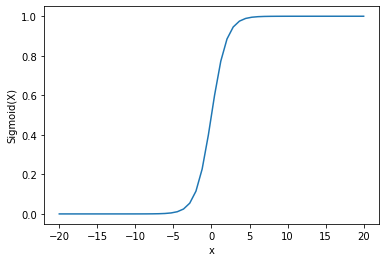

In [4]:
x = np.linspace(-20, 20, 50)
z = 1/(1 + np.exp(-x))
  
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
  
plt.show()

### Funkcja tanh

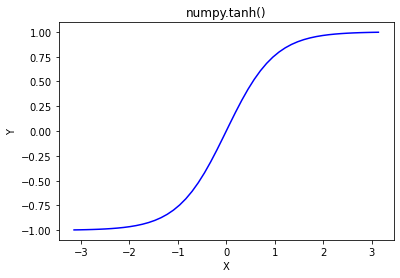

In [8]:
x = np.linspace(-np.pi, np.pi, 50)
# Tutaj wykorzystamy gotową funkcję tanh z biblioteki numpy
y = np.tanh(x)
  
plt.plot(x, y, color = 'blue')
plt.title("numpy.tanh()")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# **Co dalej?**

Zapraszam do eksperymentowania z powyższym kodem:

*   zmiany zbiorów danych
*   zmiany parametrów
*   zapoznania się z dokumentacją



